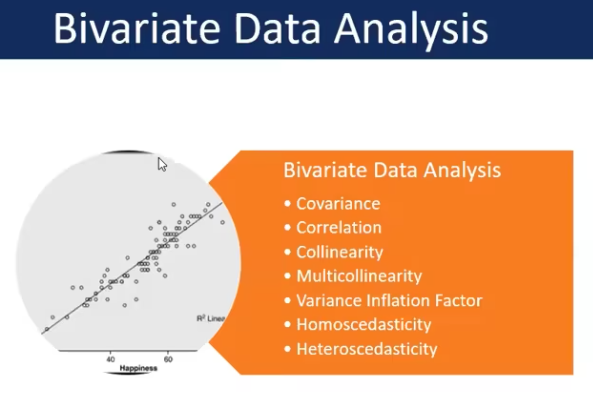

In [24]:
import numpy as np
import pandas as pd

In [44]:
data = pd.read_csv('preProcessed_data.csv')
data.head(5)

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed,1.0,67.00,91.00,58.00,55.0,58.80,270000.000000
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed,2.0,79.33,78.33,77.48,86.5,66.28,200000.000000
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed,3.0,65.00,68.00,64.00,75.0,57.80,250000.000000
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed,4.0,56.00,52.00,52.00,66.0,59.43,288655.405405
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed,5.0,85.80,73.60,73.30,96.8,55.50,425000.000000


In [32]:
data.isnull().sum()

gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
dtype: int64

In [38]:
dir(data)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__arrow_c_stream__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 '__pow__',
 '__r

### Covariance

In [59]:
#only numerical columns we can check for covariance:
data.select_dtypes(include=['number']).cov()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,3870.000000,-52.641355,-58.106028,-40.413645,52.556168,8.102336,2.484009e+05
ssc_p,-52.641355,117.228377,60.348373,42.897137,37.659225,24.535952,1.976764e+04
hsc_p,-58.106028,60.348373,118.755706,34.819820,35.461678,22.555846,4.600806e+04
degree_p,-40.413645,42.897137,34.819820,54.151103,21.929469,17.272020,-8.064357e+03
etest_p,52.556168,37.659225,35.461678,21.929469,176.251018,16.886973,1.571579e+05
mba_p,8.102336,24.535952,22.555846,17.272020,16.886973,34.028376,6.611551e+04
salary,248400.921950,19767.643976,46008.057275,-8064.357161,157157.850783,66115.509283,5.999726e+09


* Term	- Meaning
* Covariance	- How two variables change together (relation).
* Positive	- Both increase together.
* Negative	- One increases, the other decreases.
* Zero	- No relation.

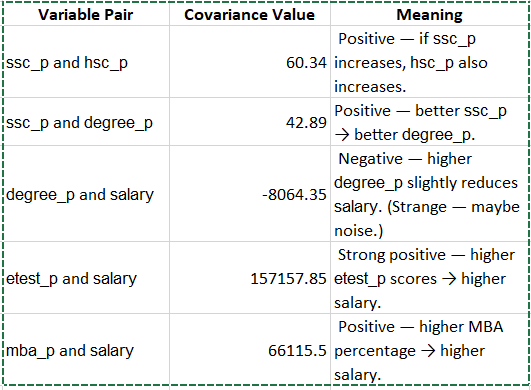

### Correlation
* Correlation measures strength and direction of relationship between two variables.

- It is always between -1 and +1:

- +1 ➔ Perfect positive relation

- 0 ➔ No relation

- -1 ➔ Perfect negative relation

In [65]:
corr = data.select_dtypes(include=['number']).corr()

In [67]:
corr

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.051550
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.023571
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.054506
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.014148
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.152829
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.146324
salary,0.051550,0.023571,0.054506,-0.014148,0.152829,0.146324,1.000000


<Axes: >

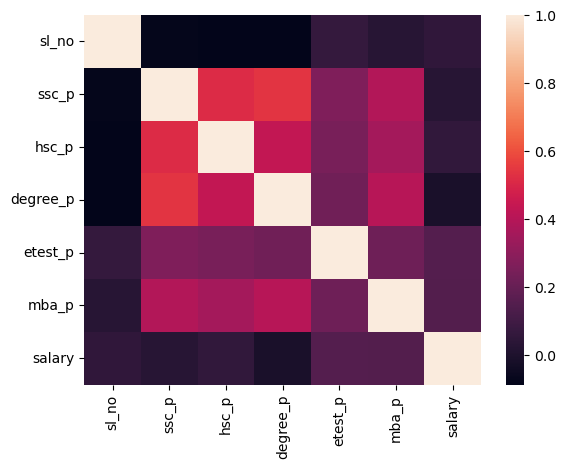

In [73]:
import seaborn as sns
sns.heatmap(corr)

### Insights: 
* ssc_p, hsc_p, and degree_p are moderately positively related —
Meaning: Students doing well in school tend to do well in degree.

* salary has very weak correlation with everything.

    - Means salary depends on other factors, maybe not on marks.

* etest_p has small positive relation with salary — if you score better in employment test, you get slightly better salary.

In [79]:
data.drop('sl_no',inplace=True,axis=1)

In [83]:
df = data.select_dtypes(include=['number'])

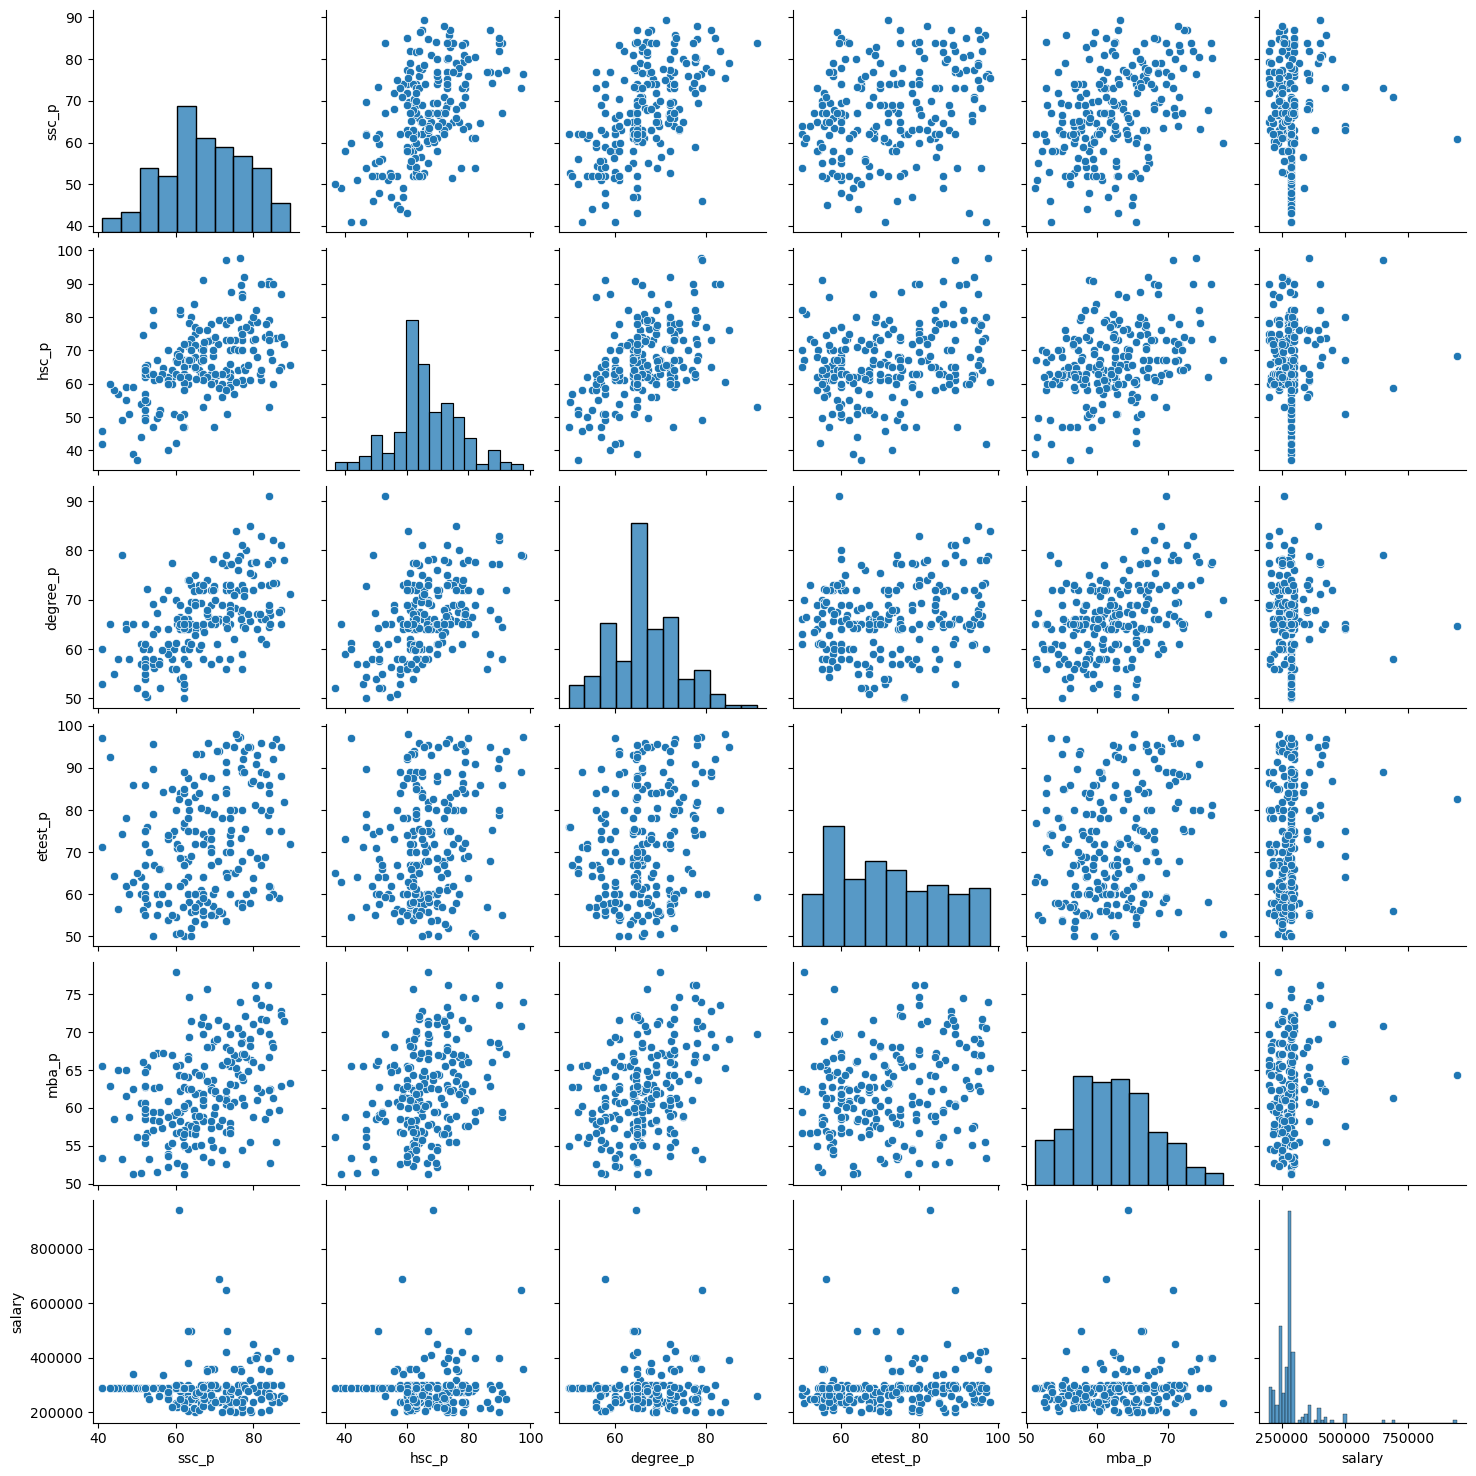

In [89]:
#Using pairplot 
sns.pairplot(df)

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif=pd.DataFrame()
    vif['variables']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

    return(vif)

In [93]:
calc_vif(df)

,variables,VIF
0,ssc_p,67.026700
1,hsc_p,56.131492
2,degree_p,112.755275
3,etest_p,33.696391
4,mba_p,108.585463
5,salary,15.167704
